# SALARY PROJECT

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import requests
from bs4 import BeautifulSoup
import urllib.request

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.shape

(397, 6)

In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [13]:
df=df.drop(columns=['discipline'])
df

,rank,yrs.since.phd,yrs.service,sex,salary
0,Prof,19,18,Male,139750
1,Prof,20,16,Male,173200
2,AsstProf,4,3,Male,79750
3,Prof,45,39,Male,115000
4,Prof,40,41,Male,141500
...,...,...,...,...,...
392,Prof,33,30,Male,103106
393,Prof,31,19,Male,150564
394,Prof,42,25,Male,101738
395,Prof,25,15,Male,95329


In [14]:
df=df.drop(columns=['sex'])
df

,rank,yrs.since.phd,yrs.service,salary
0,Prof,19,18,139750
1,Prof,20,16,173200
2,AsstProf,4,3,79750
3,Prof,45,39,115000
4,Prof,40,41,141500
...,...,...,...,...
392,Prof,33,30,103106
393,Prof,31,19,150564
394,Prof,42,25,101738
395,Prof,25,15,95329


In [24]:
plt.figure(figsize=(10,5),facecolor='blue')
plotnumber=1

<Figure size 720x360 with 0 Axes>

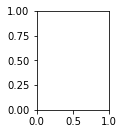

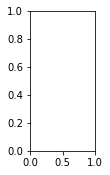

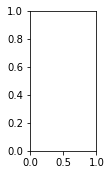

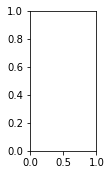

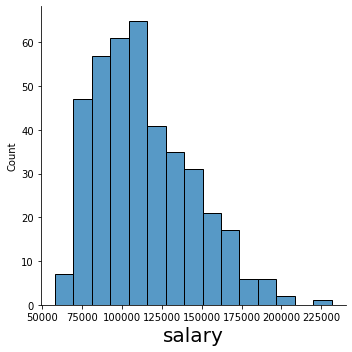

In [27]:
for column in df:
    if plotnumber<=8:
        az=plt.subplot(2,4,plotnumber)
        sns.displot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [28]:
y=df['salary']
x=df.drop(columns=['salary'])

In [29]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [30]:
x

,rank,yrs.since.phd,yrs.service
0,Prof,19,18
1,Prof,20,16
2,AsstProf,4,3
3,Prof,45,39
4,Prof,40,41
...,...,...,...
392,Prof,33,30
393,Prof,31,19
394,Prof,42,25
395,Prof,25,15


In [31]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

<Figure size 1080x720 with 0 Axes>

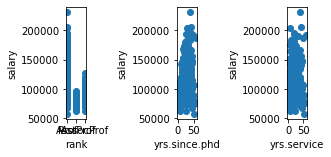

In [32]:
for column in x:
    if plotnumber<=8:
        az=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("salary",fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [34]:
scaler=StandardScaler()

In [39]:
x_scaled=scaler.fit_transform(x)
x_scaled

ValueError: could not convert string to float: 'Prof'

In [38]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr